#### Handling Imabalnced Dataset - SMOTETomek
In this notebook we will try different techniques (except oversampling and undersampling; these are presented in another notebook of this folder) to handle imbalanced data.

###### SMOTETomek

It is a technique which combines both upsampling and downsampling. Here the larger class is downsampled and lower is upsampled. SMOTE will be applied to increases the number of the samples of class 0 and Tomek will be used to remove noisy samples. But both of them are NOT DONE SIMULATENEOUSLY.

There are is an imporatant parameter named "sampling_strategy". We can set it as follow:
- ‘minority’ – resampling done only to the minority class
- ‘not majority’ – resample all classes except the majority class. This is default.
- ‘not minority’ – resample all classes except minority class
- ‘all’ – resample all classes

In [8]:
# Importing necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# Loading the dataset

credit_card = pd.read_csv('creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
# Checking is there any null values and the type of the values

credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [75]:
# We can also use this below command to check for null values
credit_card.isnull().values.any()

# If yes, we can see the number of null values in each column
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
# Checking if there any duplicate values into the dataset

dup_rows = credit_card[credit_card.duplicated()]
dup_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


This result shows that there are some exact duplicate values and there are very close values which are identified as duplicate by pandas. We have 1,081 rows of duplicate values among total 284,807 values. So, either we can easily drop the duplicate rows or, we can also emphasize on the amount of transaction to be sure about the real duplicate values and then remove them.

In [25]:
dup_rows_amount = dup_rows[dup_rows.duplicated(['Amount'])]
dup_rows_amount

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
1382,1074.0,-2.248488,-0.195670,0.026949,-0.525780,-0.238759,-0.033359,0.162196,0.928520,-0.424215,...,-0.032208,-0.745757,-0.243193,-0.821633,-0.030402,0.335838,-0.286998,-0.243768,158.00,0
1384,1074.0,-2.445204,-0.505494,0.164511,-0.449658,0.460784,-0.509035,-0.490478,1.060597,-0.385591,...,0.060361,-0.802101,-0.299229,-0.831608,-0.055518,0.315454,-0.467257,-0.167591,1.00,0
2005,1548.0,-1.559446,1.425546,0.812589,-1.129381,0.507528,0.183507,0.654304,0.088059,0.480018,...,-0.283995,-0.413642,-0.234995,-0.789509,0.324851,0.419737,0.329608,0.351346,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282210,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,...,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0
282211,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,...,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0
282212,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,...,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0
282213,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,...,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0


In [32]:
# So the we can remove the duplicate rows from the original dataset and create the final dataset

credit_card_final = credit_card[~credit_card.isin(dup_rows_amount)].dropna()
credit_card_final

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


0.0    283821
1.0       482
Name: Class, dtype: int64


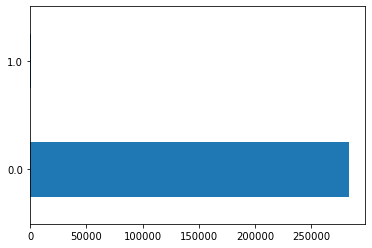

In [43]:
# Let's check the imbalanceness of the dataset

credit_card_final['Class'].value_counts().plot(kind='barh')
print(credit_card_final['Class'].value_counts())

In [76]:
# There are two values of our target class and the number of occurances are very distant to each other
# It is the evidence that our dataset is imbalanced
# Now let's continue with SMOTETomek to handle the imbalance dataset

In [51]:
# First divide our dataset into feature and target variables

X = credit_card.drop(['Class'], axis = 1)
y = credit_card['Class']

In [45]:
from imblearn.combine import SMOTETomek

In [87]:
# Now first create an object of SMOTETomek and fit our dataset
# The number of class 0 will be oversampled to number of class 1

x_count = (X_sampled.V1).count()
sampled_data = SMOTETomek(sampling_strategy = {0:x_count})
X_sampled, y_sampled = sampled_data.fit_sample(X, y)

print((X_sampled.V1).count())
print((y_sampled).count())

C:\Users\emamu\miniconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (567506) in class 0 will be larger than the number of samples in the majority class (class #0 -> 284315)
  warnings.warn(
C:\Users\emamu\miniconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (567506) in class 0 will be larger than the number of samples in the majority class (class #0 -> 284315)
  warnings.warn(


567934
567934


So we can see that now we have a dataset with a equal number of samples from each class
But if we want to do both of them,we can pipeline 2 samplers

In [96]:
# Importing pipeline, oversampler (SMOTE) and undersampler (NearMiss)

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [105]:
# Number of samples from both of the classes will be 50,000
count_class_0 = 50000
count_class_1 = 50000


# In our dataset the number of positive cases is low, i.e. class_1 is lower
# class_1 will be oversampled and class_0 will be undersampled

sampled_data_p = make_pipeline(
    NearMiss(sampling_strategy={0: count_class_0}),
    SMOTE(sampling_strategy={1: count_class_1}))
    
X_sampled_p, y_sampled_p = sampled_data_p.fit_resample(X, y)

In [106]:
print((X_sampled_p.V1).count())
print((y_sampled_p).count())

100000
100000


So total number of samples is 100,000 (50,000 samples from each class)